In [1]:
# importing all my revelant packages and imports

%run helpers.py
%run helpers-Copy1.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



### Executive Summary

In [49]:
#importing the scraped data from previous notebook
scraped=pd.read_excel('./scraped.xls')

In [62]:
test=pd.DataFrame(scraped[scraped.salary.isnull()])

In [89]:
test1=pd.DataFrame(test.drop(['salary'],axis=1))
# test1[test1.isnull()==True]
test1.isnull().sum()
test1.drop(['company'],axis=1,inplace=True)
cleanned=pd.DataFrame(test1.drop(1))
cleanned.isnull().sum()
cleanned.to_excel('./test.xls')

In [3]:
#checking it out
scraped.columns

Index([u'area', u'class', u'company', u'date', u'description', u'job_id',
       u'level', u'location', u'salary', u'sub_class', u'title', u'type'],
      dtype='object')

In [4]:
# investigating it

print scraped.shape
print scraped.info()
scraped.head()


(30312, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30312 entries, 1 to 30312
Data columns (total 12 columns):
area           30311 non-null object
class          30311 non-null object
company        21172 non-null object
date           30311 non-null object
description    30312 non-null object
job_id         30312 non-null int64
level          30312 non-null object
location       30311 non-null object
salary         9976 non-null object
sub_class      30311 non-null object
title          30311 non-null object
type           30311 non-null object
dtypes: int64(1), object(11)
memory usage: 3.0+ MB
None


,area,class,company,date,description,job_id,level,location,salary,sub_class,title,type
1,NaN,NaN,NaN,NaN,Join a talented and dynamic team in multi-chan...,35046021,premiumJob,NaN,NaN,NaN,NaN,NaN
2,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Energy & Water Ombudsman NSW,19 Dec 2017,Seeking an experienced desktop support analyst...,35118800,premiumJob,Sydney,NaN,Business/Systems Analysts,Data Analysis and Support Officer,Part Time
3,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,NaN,21 Dec 2017,Expertise in Data Architecture frameworks e.g....,35132539,normalJob,ACT,NaN,Architects,Data Architect,Contract/Temp
4,"CBD, Inner West & Eastern Suburbs",Healthcare & Medical,NaN,21 Dec 2017,"Analyse financial, human resource, service del...",35131963,normalJob,Townsville & Northern QLD,Great remuneration & benefits!,Management,Finance and Data Manager,Contract/Temp
5,"CBD, Inner West & Eastern Suburbs",Accounting,NaN,21 Dec 2017,"Analyse financial, human resource, service del...",35131964,normalJob,Townsville & Northern QLD,Great remuneration & benefits!,Management,Finance and Data Manager,Contract/Temp


# Cleaning


In [5]:
#getting rid of duplicates

# i used job_id because it is the websites default way to make each job posting unique will better get rid of duplicates

print len(scraped.job_id.value_counts())

scraped.drop_duplicates(subset='job_id',inplace=True)
print scraped.shape

23455
(23455, 12)


In [6]:
# trying to clean salary cause its a main thing
scraped=scraped[scraped['salary'].isnull()==False]
scraped.head()

,area,class,company,date,description,job_id,level,location,salary,sub_class,title,type
4,"CBD, Inner West & Eastern Suburbs",Healthcare & Medical,NaN,21 Dec 2017,"Analyse financial, human resource, service del...",35131963,normalJob,Townsville & Northern QLD,Great remuneration & benefits!,Management,Finance and Data Manager,Contract/Temp
5,"CBD, Inner West & Eastern Suburbs",Accounting,NaN,21 Dec 2017,"Analyse financial, human resource, service del...",35131964,normalJob,Townsville & Northern QLD,Great remuneration & benefits!,Management,Finance and Data Manager,Contract/Temp
7,Southern Suburbs & Logan,Information & Communication Technology,Opus Recruitment Solutions,21 Dec 2017,DATA SCIENCE SUPERSTARS\r\n\r\nMODERN OFFICES\...,35131268,normalJob,Sydney,$100000 - $220000 per annum,Database Development & Administration,Data Science Leads,Full Time
9,Parramatta & Western Suburbs,Information & Communication Technology,Infinity Pro,21 Dec 2017,"Risk Data Insight Analyst - Control, Risk Data...",35130722,normalJob,Sydney,Great Rems + End User + Parking + Generous Bon...,Consultants,Risk Data Insight Analyst - Risk / Investigati...,Full Time
11,North Shore & Northern Beaches,Information & Communication Technology,Spark Recruitment,21 Dec 2017,Take ownership for the strategic development o...,35130098,normalJob,Sydney,$150k - $160k p.a. + bonus,Product Management & Development,Product Manager - Big Data / Data Analytics,Full Time


In [7]:
#cleaning the date and converting it to useable datetime format:

scraped['date']=pd.to_datetime(scraped['date'])

In [8]:
#cleaning the locations
lists=[]
for item in scraped['location'].values:
    try:
        lists.append(item.split(' '))
    except:
        pass
    
#getting only the first location not any other info because it doesn't really help: 
for n,item in enumerate(lists):
    lists[n]=item[0]

print len(lists)#len of list and len of scraped df are off by one so

scraped.location=lists#equating it to the cleaned values
scraped=scraped.reset_index(drop=True)#reseting the index
scraped.head()

7750


,area,class,company,date,description,job_id,level,location,salary,sub_class,title,type
0,"CBD, Inner West & Eastern Suburbs",Healthcare & Medical,NaN,2017-12-21,"Analyse financial, human resource, service del...",35131963,normalJob,Townsville,Great remuneration & benefits!,Management,Finance and Data Manager,Contract/Temp
1,"CBD, Inner West & Eastern Suburbs",Accounting,NaN,2017-12-21,"Analyse financial, human resource, service del...",35131964,normalJob,Townsville,Great remuneration & benefits!,Management,Finance and Data Manager,Contract/Temp
2,Southern Suburbs & Logan,Information & Communication Technology,Opus Recruitment Solutions,2017-12-21,DATA SCIENCE SUPERSTARS\r\n\r\nMODERN OFFICES\...,35131268,normalJob,Sydney,$100000 - $220000 per annum,Database Development & Administration,Data Science Leads,Full Time
3,Parramatta & Western Suburbs,Information & Communication Technology,Infinity Pro,2017-12-21,"Risk Data Insight Analyst - Control, Risk Data...",35130722,normalJob,Sydney,Great Rems + End User + Parking + Generous Bon...,Consultants,Risk Data Insight Analyst - Risk / Investigati...,Full Time
4,North Shore & Northern Beaches,Information & Communication Technology,Spark Recruitment,2017-12-21,Take ownership for the strategic development o...,35130098,normalJob,Sydney,$150k - $160k p.a. + bonus,Product Management & Development,Product Manager - Big Data / Data Analytics,Full Time


In [9]:
#only company column has null values 
scraped.isnull().sum()

area              0
class             0
company        1617
date              0
description       0
job_id            0
level             0
location          0
salary            0
sub_class         0
title             0
type              0
dtype: int64

In [10]:
#removed company null values
scraped=scraped[scraped['company'].isnull()==False]
scraped=scraped.reset_index(drop=True)

In [11]:
#general cleaning done now
print scraped.shape
print scraped.info()

(6133, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6133 entries, 0 to 6132
Data columns (total 12 columns):
area           6133 non-null object
class          6133 non-null object
company        6133 non-null object
date           6133 non-null datetime64[ns]
description    6133 non-null object
job_id         6133 non-null int64
level          6133 non-null object
location       6133 non-null object
salary         6133 non-null object
sub_class      6133 non-null object
title          6133 non-null object
type           6133 non-null object
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 575.0+ KB
None


# Salary Cleaning

In [12]:
# going to use this to get rid of stuff i don't need in salary column

#letters without 'k' or 'K'
letters='abcdefghijlmnopqrstuvwxyzABCDEFGHIJLMNOPQRSTUVWXYZ'
numbers=string.digits
#punctuation without '-'
elements='!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~ '



In [15]:
#turning unicode into useable strings:
#Also the issue here is that it can only run once because once it converts it string the code doesn't work and throws an error 

import unicodedata

strings=[]

                        # i commented it out so it doesn't mess things up

# for item in scraped['salary']:
#     try:
#         r=unicodedata.normalize('NFKD', item).encode('ascii','ignore')# i commented it out so it doesn't mess things up
#         strings.append(r)
#     except:
#         pass

# making sure the len of string is the same throughout
print len(strings)
strings[:5]



6133


['$100000 - $220000 per annum',
 'Great Rems + End User + Parking + Generous Bonuses',
 '$150k - $160k p.a. + bonus',
 'End User Company - Great Remuneration & Benefits',
 '$160-$200k + super']

In [16]:
scraped['salary']=strings

In [17]:
#checking to make sure the type is a string:
for value in scraped['salary']:
    print type(value)
    print value
    break

<type 'str'>
$100000 - $220000 per annum


In [18]:
#getting rid of letters/words and punctuation except 'k' and '-' because they will come in handy:

numbered=[]#creating a list to store the cleaned values
for item in scraped['salary'].values:
    #this piece of code i copied from stackoverflow but i understand how it works and it requires the 
    #item to be str type and not unicode:
    all=string.maketrans('','')
    noletters=item.translate(all, letters)
    numbers=noletters.translate(all, elements)
    
    numbered.append(numbers.lower())
    

# making sure the len of numbered is the same throughout
print len(numbered)
numbered[:10]

6133


['100000-220000',
 'k',
 '150k-160k',
 '-',
 '160-200k',
 '',
 '70000-95000',
 '70000-95000',
 '90000-119999',
 'k']

In [19]:
#turning only empty, only'k' and only'-' values into zero but if 'k' and '-' are not on their own then then are very useful:


for n,i in enumerate(numbered):
    if i=="" : numbered[n]='0'
    elif i=="k" : numbered[n]='0'
    elif i=="-" : numbered[n]='0'
        
# making sure the len of numbered is the same throughout
print len(numbered)
numbered[:10]

6133


['100000-220000',
 '0',
 '150k-160k',
 '0',
 '160-200k',
 '0',
 '70000-95000',
 '70000-95000',
 '90000-119999',
 '0']

In [20]:
#spliting the numbers on '-':

for n,item in enumerate(numbered):
    numbered[n]=item.split('-')
    
# making sure the len of numbered is the same throughout    
print len(numbered)
numbered[:10]

6133


[['100000', '220000'],
 ['0'],
 ['150k', '160k'],
 ['0'],
 ['160', '200k'],
 ['0'],
 ['70000', '95000'],
 ['70000', '95000'],
 ['90000', '119999'],
 ['0']]

In [21]:
#converting the 'k' value to '000' because thats what it means:

for n,it in enumerate(numbered):
#     print it[0]
    
    for item in it:#each [it] is a list because of splitting them in the previous code
        if 'k' in item:# this is checking if 'k' even exist in those lists(['160','200k])
                       # by checking for 'k' in each item in the list
            
            #so here if the list contain k then only the first item in list:
            if 'k' in it[0]:
            # 1) if it had k then replace it with '000'
                numbered[n]=[it[0].replace('k','000')]
            else:
            # 2) otherwise just add '000' because the other value
            #   in the list had a 'k' but not the first item/value meaning they are both 
            #   using the same value.
                numbered[n]=[it[0]+'000']
                
            # the other thing that is happening is the i am reseting the value with the cleaned first one because i explained that
            # the first value in a range is better
                
                
# making sure the len of numbered is the same throughout        
print len(numbered)
numbered[:10]

6133


[['100000', '220000'],
 ['0'],
 ['150000'],
 ['0'],
 ['160000'],
 ['0'],
 ['70000', '95000'],
 ['70000', '95000'],
 ['90000', '119999'],
 ['0']]

In [22]:
# covnerting to int:

for n,item in enumerate(numbered):
    try:
        numbered[n]=int(item[0])
    except:
        pass


# making sure the len of numbered is the same throughout
print len(numbered)
numbered[:10]

6133


[100000, 0, 150000, 0, 160000, 0, 70000, 70000, 90000, 0]

In [23]:
# sorting out:

for n,item in enumerate(numbered):
    
    #1) per day salaries and converitng them to per annum
    if 250 <= item <= 1500:
        numbered[n]=item*5*52
        
    #2) per hour to per annum 
    elif 17 <= item <= 70:
        numbered[n]=item*8*5*52
    
    #3) getting rid of small numbers
    elif item<17:
        numbered[n]=0
    
    #4) getting rid of numbers that don't fall in any category don't make any sense which aren't many
    elif 1500<=item<=10000:
        numbered[n]=0
    
    # 5) these numbers could be per hour or per annum(they don't have k) so i calculated both and got the average of them:
    elif 70<= item <=250:
        x=(item*8*5*52+(item*1000))/2
        numbered[n]=x
# making sure the len of numbered is the same throughout        
print len(numbered)
numbered[:30]


6133


[100000,
 0,
 150000,
 0,
 160000,
 0,
 70000,
 70000,
 90000,
 0,
 0,
 120000,
 10000000,
 85000,
 11500000010L,
 260000,
 200200,
 0,
 0,
 100000,
 0,
 90000,
 140000,
 62400,
 0,
 0,
 130000,
 130000,
 130000,
 55000]

In [24]:
#fixing ridiculously big values:


for n,item in enumerate(numbered):
    if item>10**8:
        numbered[n]=0
    elif item>250000:
        c=[]
        c.append(item)
        for x in c:
            if x>250000:
                c.append(x/10)
            else:
                break
        numbered[n]=c[-1]
                
    else:
        pass
# making sure the len of numbered is the same throughout
print len(numbered)
numbered[:30]

6133


[100000,
 0,
 150000,
 0,
 160000,
 0,
 70000,
 70000,
 90000,
 0,
 0,
 120000,
 100000,
 85000,
 0,
 26000,
 200200,
 0,
 0,
 100000,
 0,
 90000,
 140000,
 62400,
 0,
 0,
 130000,
 130000,
 130000,
 55000]

In [25]:
# converting all the salaries to per day because its better especailly with 'contract': 

for n,item in enumerate(numbered):
    numbered[n]=item/52/5
# making sure the len of numbered is the same throughout     
print len(numbered)
numbered[:30]

6133


[384,
 0,
 576,
 0,
 615,
 0,
 269,
 269,
 346,
 0,
 0,
 461,
 384,
 326,
 0,
 100,
 770,
 0,
 0,
 384,
 0,
 346,
 538,
 240,
 0,
 0,
 500,
 500,
 500,
 211]

In [26]:
scraped['salary']=numbered

In [27]:
salary=scraped[scraped['salary']!=0]
salary.reset_index(drop=True,inplace=True)
print salary.shape
print salary.info()
salary.head()


(4335, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 12 columns):
area           4335 non-null object
class          4335 non-null object
company        4335 non-null object
date           4335 non-null datetime64[ns]
description    4335 non-null object
job_id         4335 non-null int64
level          4335 non-null object
location       4335 non-null object
salary         4335 non-null int64
sub_class      4335 non-null object
title          4335 non-null object
type           4335 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 406.5+ KB
None


,area,class,company,date,description,job_id,level,location,salary,sub_class,title,type
0,Southern Suburbs & Logan,Information & Communication Technology,Opus Recruitment Solutions,2017-12-21,DATA SCIENCE SUPERSTARS\r\n\r\nMODERN OFFICES\...,35131268,normalJob,Sydney,384,Database Development & Administration,Data Science Leads,Full Time
1,North Shore & Northern Beaches,Information & Communication Technology,Spark Recruitment,2017-12-21,Take ownership for the strategic development o...,35130098,normalJob,Sydney,576,Product Management & Development,Product Manager - Big Data / Data Analytics,Full Time
2,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,2XM Technology Pty Ltd,2017-12-21,Data Solution Architect required to work on a ...,35129596,normalJob,Sydney,615,Architects,Big Data Solution Architect,Full Time
3,CBD & Inner Suburbs,Engineering,Employment Office,2017-12-21,Are you an experienced Surveyor looking for an...,35131526,normalJob,Melbourne,269,Project Engineering,Surveyor Data Manager,Full Time
4,CBD & Inner Suburbs,Engineering,Employment Office,2017-12-21,Are you an experienced Surveyor looking for an...,35131487,normalJob,Melbourne,269,Civil/Structural Engineering,Surveyor Data Manager,Full Time


In [28]:
# Saving it as an excel file for later use and analysis:

salary.to_excel('./cleaned.xls')

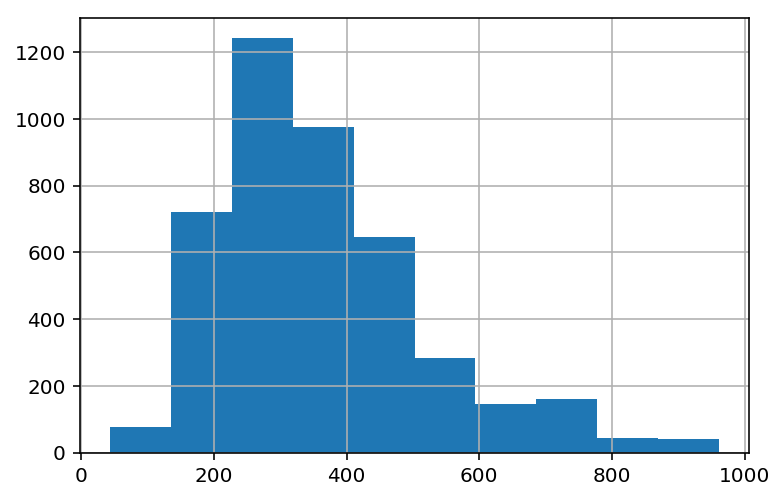

In [33]:
_=salary['salary'].hist()

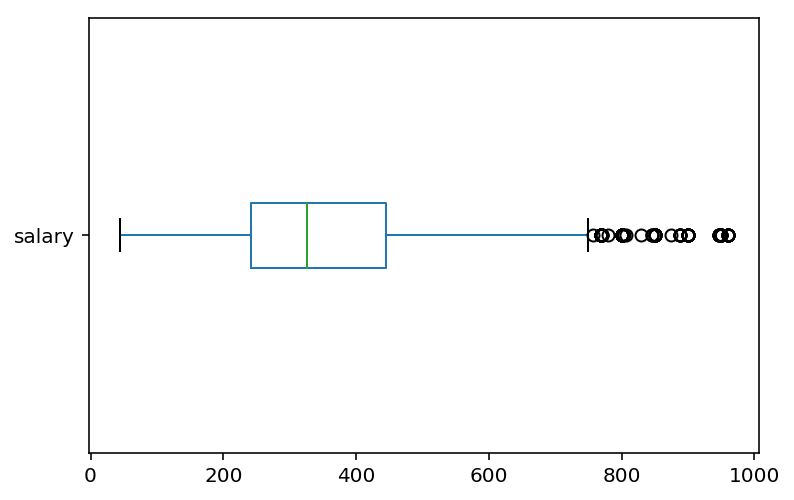

In [42]:
_=salary.salary.plot(kind='box',vert=False)

In [48]:
scraped['salary'].isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
6103    False
6104    False
6105    False
6106    False
6107    False
6108    False
6109    False
6110    False
6111    False
6112    False
6113    False
6114    False
6115    False
6116    False
6117    False
6118    False
6119    False
6120    False
6121    False
6122    False
6123    False
6124    False
6125    False
6126    False
6127    False
6128    False
6129    False
6130    False
6131    False
6132    False
Name: salary, Length: 6133, dtype: bool

In [1]:
39+3+91+59+7

199